In [1]:
import pandas as pd


In [2]:
uc_df = pd.read_csv('Resources/used_carswithindex.csv')
cr_df = pd.read_csv('Resources/ratings_used_cars.csv')

In [3]:
print(uc_df.head())
print(cr_df.head())

   index  year_made fuel_type  seats  mileage  ownership transmission  \
0      0         17    Petrol      5    34796          1    Automatic   
1      1         21    Petrol      5    19023          1    Automatic   
2      2         18    Diesel      5    14912          1    Automatic   
3      3         19    Petrol      5    11419          1       Manual   
4      4         19    Petrol      5    27899          1    Automatic   

   fuel_economy  engine(cc)  horsepower  torque(Nm)    price           Make  \
0          7.81      2996.0      2996.0       333.0  86062.5  Mercedes-Benz   
1         17.40       999.0       999.0      9863.0  12136.5         Nissan   
2         20.68      1995.0      1995.0       188.0  32062.5            BMW   
3         16.50      1353.0      1353.0     13808.0  18306.0            Kia   
4         14.67      1798.0      1798.0     17746.0  32400.0          Skoda   

     Model  
0  S-Class  
1  Magnite  
2       X1  
3   Seltos  
4   Superb  
   index

In [4]:
print(uc_df.isnull().sum())
print(cr_df.isnull().sum())

index           0
year_made       0
fuel_type       0
seats           0
mileage         0
ownership       0
transmission    0
fuel_economy    3
engine(cc)      3
horsepower      3
torque(Nm)      4
price           0
Make            0
Model           0
dtype: int64
index           0
fuel_type       0
seats           0
mileage         0
ownership       0
transmission    0
fuel_economy    3
engine(cc)      3
horsepower      3
torque(Nm)      4
price           0
Make            0
Model           0
car_rating      4
dtype: int64


In [5]:
uc_df_cleaned = uc_df.dropna()
cr_df_cleaned = cr_df.dropna()

In [6]:
print(uc_df_cleaned.isnull().sum())
print(cr_df_cleaned.isnull().sum())

index           0
year_made       0
fuel_type       0
seats           0
mileage         0
ownership       0
transmission    0
fuel_economy    0
engine(cc)      0
horsepower      0
torque(Nm)      0
price           0
Make            0
Model           0
dtype: int64
index           0
fuel_type       0
seats           0
mileage         0
ownership       0
transmission    0
fuel_economy    0
engine(cc)      0
horsepower      0
torque(Nm)      0
price           0
Make            0
Model           0
car_rating      0
dtype: int64


In [7]:
# merge the datasets on the 'index', 'Make', and 'Model' columns
merged_df = pd.merge(uc_df_cleaned, cr_df_cleaned, on=['index', 'Make', 'Model'])

In [8]:
print(merged_df.head())
print(merged_df.columns)

   index  year_made fuel_type_x  seats_x  mileage_x  ownership_x  \
0      0         17      Petrol        5      34796            1   
1      1         21      Petrol        5      19023            1   
2      2         18      Diesel        5      14912            1   
3      3         19      Petrol        5      11419            1   
4      4         19      Petrol        5      27899            1   

  transmission_x  fuel_economy_x  engine(cc)_x  horsepower_x  ...  seats_y  \
0      Automatic            7.81        2996.0        2996.0  ...        5   
1      Automatic           17.40         999.0         999.0  ...        5   
2      Automatic           20.68        1995.0        1995.0  ...        5   
3         Manual           16.50        1353.0        1353.0  ...        5   
4      Automatic           14.67        1798.0        1798.0  ...        5   

   mileage_y ownership_y transmission_y fuel_economy_y  engine(cc)_y  \
0   0.068422         0.0      Automatic       0.00

In [9]:
print(merged_df.columns)

Index(['index', 'year_made', 'fuel_type_x', 'seats_x', 'mileage_x',
       'ownership_x', 'transmission_x', 'fuel_economy_x', 'engine(cc)_x',
       'horsepower_x', 'torque(Nm)_x', 'price_x', 'Make', 'Model',
       'fuel_type_y', 'seats_y', 'mileage_y', 'ownership_y', 'transmission_y',
       'fuel_economy_y', 'engine(cc)_y', 'horsepower_y', 'torque(Nm)_y',
       'price_y', 'car_rating'],
      dtype='object')


In [10]:
merged_df['mileage_per_year'] = merged_df['mileage_x'] / merged_df['year_made']

In [11]:
merged_df = merged_df.drop(columns=['fuel_type_y', 'seats_y', 'mileage_y', 'ownership_y',
                                    'transmission_y', 'fuel_economy_y', 'engine(cc)_y',
                                    'horsepower_y', 'torque(Nm)_y', 'price_y'])

merged_df['mileage_per_year'] = merged_df['mileage_x'] / merged_df['year_made']

In [12]:
# calculate car age
import datetime

current_year = datetime.datetime.now().year

merged_df['car_age'] = current_year - merged_df['year_made']

merged_df['mileage_per_year'] = merged_df['mileage_x'] / merged_df['car_age']

print(merged_df[['year_made', 'car_age', 'mileage_per_year']].head())


   year_made  car_age  mileage_per_year
0         17     2007         17.337319
1         21     2003          9.497254
2         18     2006          7.433699
3         19     2005          5.695262
4         19     2005         13.914713


In [13]:
print(merged_df.columns)

Index(['index', 'year_made', 'fuel_type_x', 'seats_x', 'mileage_x',
       'ownership_x', 'transmission_x', 'fuel_economy_x', 'engine(cc)_x',
       'horsepower_x', 'torque(Nm)_x', 'price_x', 'Make', 'Model',
       'car_rating', 'mileage_per_year', 'car_age'],
      dtype='object')


# Build Model

In [14]:
merged_df = merged_df.drop(columns=['fuel_type_x'])
merged_df = merged_df.drop(columns=['transmission_x'])

In [17]:
# build Model ---------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

#3: create a pipeline that directly fits the model
model = Pipeline(steps=[('model', RandomForestRegressor(random_state=42))])

# 4: define the features and target variable
X = merged_df.drop(columns=['price_x', 'Make', 'Model', 'index'])
y = merged_df['price_x']

#5: split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6: train the model
model.fit(X_train, y_train)

#7: make predictions
y_pred = model.predict(X_test)

#8: evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 317546.3942532467


 # improve the model now with random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

#1: create the pipeline 
model = Pipeline(steps=[('model', RandomForestRegressor(random_state=42))])

#2: define the hyperparameter grid for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],      # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

#3: set up GridSearchCV for Random Forest
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

#4: train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

#5: get the best model from the grid search
best_model = grid_search.best_estimator_

#6: make predictions with the best model
y_pred = best_model.predict(X_test)

# 7: evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error after tuning: {mae}")


Mean Absolute Error after tuning: 358477.5312986263


Number of features: 11
Number of importances: 11


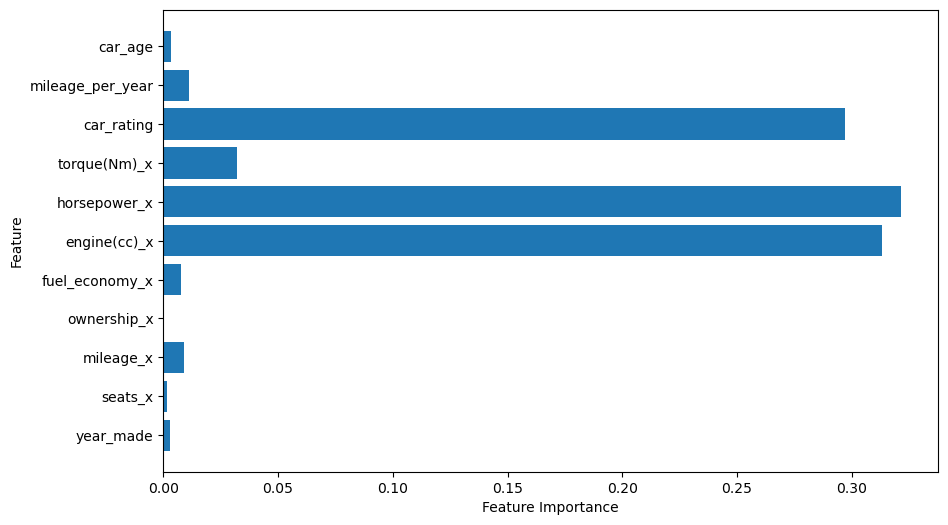

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# extract the model from the best pipeline
model = best_model.named_steps['model']

# use feature names from X_train
all_feature_names = X_train.columns

# random Forest model
feature_importances = model.feature_importances_


print(f"Number of features: {len(all_feature_names)}")
print(f"Number of importances: {len(feature_importances)}")

plt.figure(figsize=(10, 6))
plt.barh(all_feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()




In [22]:
#RESULTS------------------------------- explanation

# engine is the highest importance, indicating that the engine size is #1 factor in predicting car prices.
# horsepower is next vehicle price estimation.
# car_rating also plays a huge role




# PREDICT

In [23]:
merged_df

,index,year_made,seats_x,mileage_x,ownership_x,fuel_economy_x,engine(cc)_x,horsepower_x,torque(Nm)_x,price_x,Make,Model,car_rating,mileage_per_year,car_age
0,0,17,5,34796,1,7.81,2996.0,2996.0,333.0,86062.5,Mercedes-Benz,S-Class,23.380796,17.337319,2007
1,1,21,5,19023,1,17.40,999.0,999.0,9863.0,12136.5,Nissan,Magnite,40.753425,9.497254,2003
2,2,18,5,14912,1,20.68,1995.0,1995.0,188.0,32062.5,BMW,X1,29.366446,7.433699,2006
3,3,19,5,11419,1,16.50,1353.0,1353.0,13808.0,18306.0,Kia,Seltos,33.962524,5.695262,2005
4,4,19,5,27899,1,14.67,1798.0,1798.0,17746.0,32400.0,Skoda,Superb,32.433830,13.914713,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,1536,20,5,21747,1,1493.00,11345.0,11345.0,250.0,23503.5,Hyundai,Creta,54.749749,10.851796,2004
1533,1537,20,5,6213,1,999.00,6706.0,6706.0,91.0,5373.0,Renault,KWID,50.122245,3.100299,2004
1534,1538,17,5,30447,1,17.50,1199.0,1199.0,887.0,7897.5,Honda,WR-V,23.992638,15.170404,2007
1535,1539,18,5,24854,2,18.78,999.0,999.0,75.0,6412.5,Volkswagen,Polo,3.460494,12.389831,2006


In [ ]:
# iterate thorugh the rows and five years down the road predict price of makes and models based on engine(cc)_x,horsepower_x, car_rating

In [24]:
# drop rows with missing values in X
X = X.dropna()

# drop rows with missing values in y
y = y[X.index]

# splitting and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [27]:
import pandas as pd

model_to_use = best_model  

# prepare an empty list to store future predictions
future_predictions = []

# iterate through each row 
for _, row in merged_df.iterrows():
    # Prepare the feature data for the current row
    feature_data = pd.DataFrame([{
        'engine(cc)_x': row.get('engine(cc)_x', 0),
        'horsepower_x': row.get('horsepower_x', 0),
        'car_rating': row.get('car_rating', 0)
    }])
    
    # feature_data has the same columns as X_train
    feature_data = feature_data.reindex(columns=X_train.columns, fill_value=0)
    
    # predict the price for 5 years 
    future_price = model_to_use.predict(feature_data)[0]
    
    # store prediction
    future_predictions.append({
        'Make': row['Make'],
        'Model': row['Model'],
        'predicted_price_in_5_years': future_price
    })

future_predictions_df = pd.DataFrame(future_predictions)

print(future_predictions_df.head())



            Make    Model  predicted_price_in_5_years
0  Mercedes-Benz  S-Class                   10011.375
1         Nissan  Magnite                   60567.210
2            BMW       X1                   11712.780
3            Kia   Seltos                   57260.250
4          Skoda   Superb                   50209.830


In [28]:
future_predictions_df

,Make,Model,predicted_price_in_5_years
0,Mercedes-Benz,S-Class,10011.375
1,Nissan,Magnite,60567.210
2,BMW,X1,11712.780
3,Kia,Seltos,57260.250
4,Skoda,Superb,50209.830
...,...,...,...
1532,Hyundai,Creta,9039.150
1533,Renault,KWID,7738.560
1534,Honda,WR-V,53162.865
1535,Volkswagen,Polo,51709.005


In [30]:
future_predictions_df.to_csv('future_predictions.csv', index=False)
print("Future predictions saved to 'future_predictions.csv'")

Future predictions saved to 'future_predictions.csv'
